In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns

In [12]:
df = pd.read_csv(r"C:\Users\johnk\customer churn prediction\Retention-Predictor\Data\processed_data.csv")
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_DSL,InternetService_Fiber optic,InternetService_No,IsLongTerm,NumServices,HighRiskPaymentMethod,SeniorAlone
0,0,0,1,0,1,0,0,0,1,0,...,0,1,0,1,0,0,0,1,1,0
1,1,0,0,0,34,1,0,1,0,1,...,0,0,1,1,0,0,1,3,0,0
2,1,0,0,0,2,1,0,1,1,0,...,0,0,1,1,0,0,0,3,0,0
3,1,0,0,0,45,0,0,1,0,1,...,0,0,0,1,0,0,1,3,0,0
4,0,0,0,0,2,1,0,0,0,0,...,0,1,0,0,1,0,0,1,1,0


In [13]:
df.isnull().sum()

gender                                     0
SeniorCitizen                              0
Partner                                    0
Dependents                                 0
tenure                                     0
PhoneService                               0
MultipleLines                              0
OnlineSecurity                             0
OnlineBackup                               0
DeviceProtection                           0
TechSupport                                0
StreamingTV                                0
StreamingMovies                            0
PaperlessBilling                           0
MonthlyCharges                             0
TotalCharges                               0
Churn                                      0
Contract_Month-to-month                    0
Contract_One year                          0
Contract_Two year                          0
PaymentMethod_Bank transfer (automatic)    0
PaymentMethod_Credit card (automatic)      0
PaymentMet

In [14]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

# Separate features and target
X = df.drop('Churn', axis=1)
y = df['Churn']

# Split before applying SMOTE to avoid data leakage
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply SMOTE on training set only
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)


c:\Users\johnk\anaconda3\envs\jovani\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [15]:

model = LogisticRegression(class_weight='balanced', max_iter=5000, random_state=42)
model.fit(X_train_smote, y_train_smote)
y_pred_full = model.predict(X_test_scaled)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_full))
print("\nClassification Report:\n", classification_report(y_test, y_pred_full))
print("Accuracy:", accuracy_score(y_test, y_pred_full))

Confusion Matrix:
 [[1120  429]
 [ 123  438]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.72      0.80      1549
           1       0.51      0.78      0.61       561

    accuracy                           0.74      2110
   macro avg       0.70      0.75      0.71      2110
weighted avg       0.80      0.74      0.75      2110

Accuracy: 0.738388625592417


In [16]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Get predicted probabilities for class 1
y_probs_full = model.predict_proba(X_test_scaled)[:, 1]

# Try different thresholds
for threshold in [0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85]:
    y_pred_thresh = (y_probs_full >= threshold).astype(int)
    precision = precision_score(y_test, y_pred_thresh, zero_division=0)
    recall = recall_score(y_test, y_pred_thresh, zero_division=0)
    f1 = f1_score(y_test, y_pred_thresh, zero_division=0)
    print(f"Threshold: {threshold:.2f} | Precision: {precision:.4f} | Recall: {recall:.4f} | F1 Score: {f1:.4f}")


Threshold: 0.40 | Precision: 0.4640 | Recall: 0.8610 | F1 Score: 0.6030
Threshold: 0.45 | Precision: 0.4816 | Recall: 0.8164 | F1 Score: 0.6058
Threshold: 0.50 | Precision: 0.5052 | Recall: 0.7807 | F1 Score: 0.6134
Threshold: 0.55 | Precision: 0.5303 | Recall: 0.7326 | F1 Score: 0.6153
Threshold: 0.60 | Precision: 0.5480 | Recall: 0.6916 | F1 Score: 0.6115
Threshold: 0.65 | Precision: 0.5793 | Recall: 0.6381 | F1 Score: 0.6073
Threshold: 0.70 | Precision: 0.6052 | Recall: 0.5793 | F1 Score: 0.5920
Threshold: 0.75 | Precision: 0.6487 | Recall: 0.4938 | F1 Score: 0.5607
Threshold: 0.80 | Precision: 0.6814 | Recall: 0.3850 | F1 Score: 0.4920
Threshold: 0.85 | Precision: 0.7177 | Recall: 0.2674 | F1 Score: 0.3896


In [17]:
optimal_thresh = 0.5
y_pred_opt = (y_probs_full >= optimal_thresh).astype(int)


In [18]:
from sklearn.metrics import classification_report, confusion_matrix

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_opt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_opt))
print("Accuracy:", accuracy_score(y_test, y_pred_opt))


Confusion Matrix:
 [[1120  429]
 [ 123  438]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.72      0.80      1549
           1       0.51      0.78      0.61       561

    accuracy                           0.74      2110
   macro avg       0.70      0.75      0.71      2110
weighted avg       0.80      0.74      0.75      2110

Accuracy: 0.738388625592417


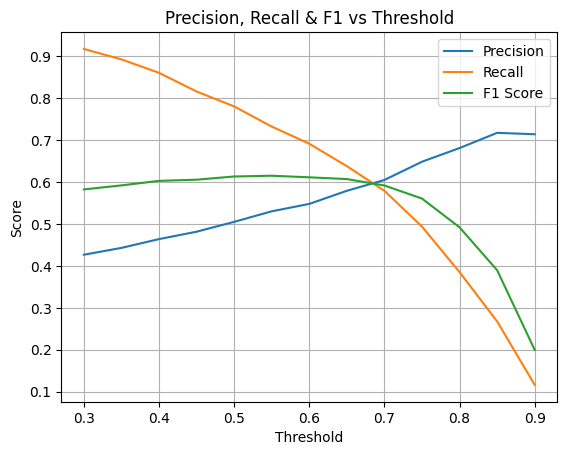

In [19]:
import matplotlib.pyplot as plt
import numpy as np

thresholds = np.arange(0.3, 0.9, 0.05)
precisions = []
recalls = []
f1s = []

for t in thresholds:
    y_t = (y_probs_full >= t).astype(int)
    precisions.append(precision_score(y_test, y_t))
    recalls.append(recall_score(y_test, y_t))
    f1s.append(f1_score(y_test, y_t))

plt.plot(thresholds, precisions, label='Precision')
plt.plot(thresholds, recalls, label='Recall')
plt.plot(thresholds, f1s, label='F1 Score')
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision, Recall & F1 vs Threshold")
plt.legend()
plt.grid(True)
plt.show()


# Top 15 features

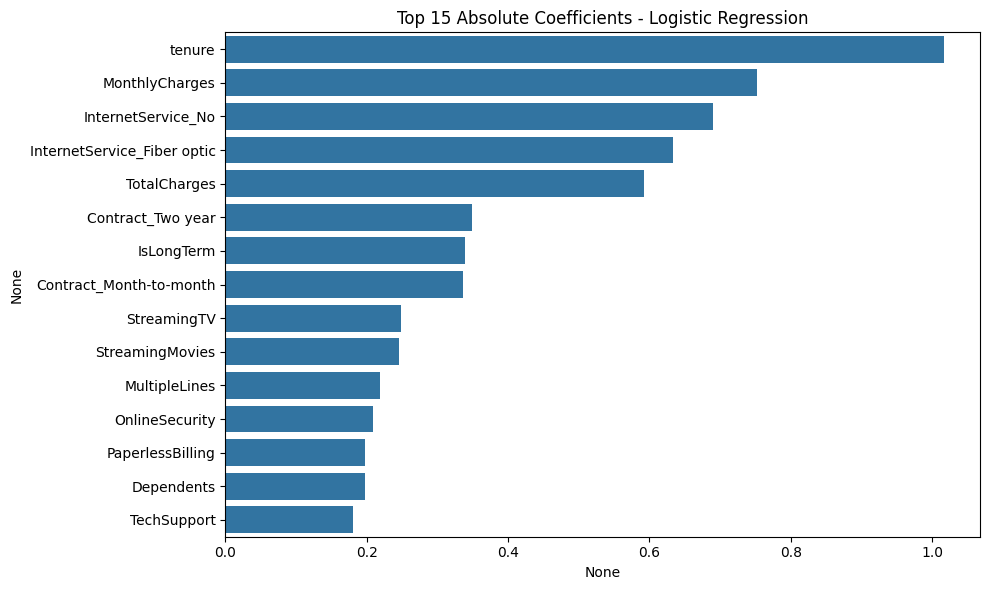

In [20]:
# Get coefficients
coeffs = pd.Series(model.coef_[0], index=X.columns)
coeffs = coeffs.abs().sort_values(ascending=False)

# Plot top 15 features
plt.figure(figsize=(10,6))
sns.barplot(x=coeffs[:15], y=coeffs.index[:15])
plt.title('Top 15 Absolute Coefficients - Logistic Regression')
plt.tight_layout()
plt.show()

In [21]:
# Get signed coefficients (not absolute)
coeffs_signed = pd.Series(model.coef_[0], index=X.columns)

# Top positive predictors
print("Top positive predictors:")
print(coeffs_signed.sort_values(ascending=False).head(10))

# Top negative predictors
print("\nTop negative predictors:")
print(coeffs_signed.sort_values().head(10))


Top positive predictors:
InternetService_Fiber optic       0.633012
TotalCharges                      0.591736
Contract_Month-to-month           0.335805
StreamingTV                       0.248066
StreamingMovies                   0.246000
MultipleLines                     0.219054
PaperlessBilling                  0.197796
NumServices                       0.073861
HighRiskPaymentMethod             0.046300
PaymentMethod_Electronic check    0.046300
dtype: float64

Top negative predictors:
tenure                -1.016935
MonthlyCharges        -0.752783
InternetService_No    -0.689622
Contract_Two year     -0.348448
IsLongTerm            -0.338900
OnlineSecurity        -0.209004
Dependents            -0.197015
TechSupport           -0.180779
InternetService_DSL   -0.062381
OnlineBackup          -0.043606
dtype: float64


In [22]:
# Select top 10 features based on absolute coefficient
top_features = coeffs.sort_values(ascending=False).head(15).index

# Create new dataset with only these features
X_top = X[top_features]


In [23]:
from sklearn.model_selection import train_test_split

X_train_top, X_test_top, y_train, y_test = train_test_split(X_top, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled_top = scaler.fit_transform(X_train_top)
X_test_scaled_top = scaler.transform(X_test_top)

# Apply SMOTE on training set only
smote_top = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote_top.fit_resample(X_train_scaled_top, y_train)



c:\Users\johnk\anaconda3\envs\jovani\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [24]:
from sklearn.linear_model import LogisticRegression

model_top = LogisticRegression(max_iter=1000)
model_top.fit(X_train_smote, y_train_smote)


LogisticRegression(max_iter=1000)

In [25]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred_top = model_top.predict(X_test_scaled_top)
print(confusion_matrix(y_test, y_pred_top))
print(classification_report(y_test, y_pred_top))



[[1113  436]
 [ 110  451]]
              precision    recall  f1-score   support

           0       0.91      0.72      0.80      1549
           1       0.51      0.80      0.62       561

    accuracy                           0.74      2110
   macro avg       0.71      0.76      0.71      2110
weighted avg       0.80      0.74      0.76      2110




### Threshold = 0.55

- **Confusion Matrix:**  
  [[1169, 380],  
   [135, 426]]

- **Classification Report:**
    - Precision (No Churn): 0.90
    - Recall (No Churn): 0.75
    - F1-score (No Churn): 0.82
    - Precision (Churn): 0.53
    - Recall (Churn): 0.76
    - F1-score (Churn): 0.62
    - **Accuracy:** 0.76

**Interpretation:**  
At this threshold, the model is more balanced. It achieves higher overall accuracy and a good trade-off between catching churners and avoiding false alarms.

In [26]:
y_probs_top = model_top.predict_proba(X_test_scaled_top)[:, 1]
y_pred_thresh = (y_probs_top >= 0.55).astype(int)  # Try different thresholds


In [27]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_thresh))
print("\nClassification Report:\n", classification_report(y_test, y_pred_thresh))
print("Accuracy:", accuracy_score(y_test, y_pred_thresh))


Confusion Matrix:
 [[1169  380]
 [ 135  426]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.75      0.82      1549
           1       0.53      0.76      0.62       561

    accuracy                           0.76      2110
   macro avg       0.71      0.76      0.72      2110
weighted avg       0.80      0.76      0.77      2110

Accuracy: 0.7559241706161137


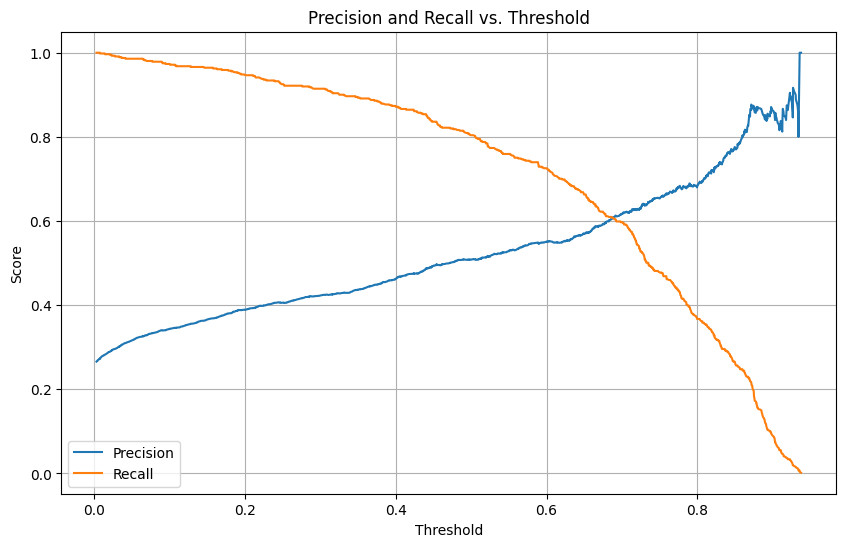

In [28]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, thresholds = precision_recall_curve(y_test, y_probs_top)

plt.figure(figsize=(10,6))
plt.plot(thresholds, precision[:-1], label="Precision")
plt.plot(thresholds, recall[:-1], label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision and Recall vs. Threshold")
plt.legend()
plt.grid(True)
plt.show()


### Threshold = 0.33

- **Confusion Matrix:**  
  [[878, 671],  
   [56, 505]]

- **Classification Report:**
    - Precision (No Churn): 0.94
    - Recall (No Churn): 0.57
    - F1-score (No Churn): 0.71
    - Precision (Churn): 0.43
    - Recall (Churn): 0.90
    - F1-score (Churn): 0.58
    - **Accuracy:** 0.66

**Interpretation:**  
At this lower threshold, the model is much more sensitive to churners (very high recall for churn), but at the cost of many more false positives and lower overall accuracy.

In [29]:
# Evaluate top 15 features model at threshold 0.33
y_pred_033 = (model_top.predict_proba(X_test_scaled_top)[:, 1] >= 0.33).astype(int)

print("Confusion Matrix (threshold=0.33):\n", confusion_matrix(y_test, y_pred_033))
print("\nClassification Report (threshold=0.33):\n", classification_report(y_test, y_pred_033))
print("Accuracy (threshold=0.33):", accuracy_score(y_test, y_pred_033))

Confusion Matrix (threshold=0.33):
 [[878 671]
 [ 56 505]]

Classification Report (threshold=0.33):
               precision    recall  f1-score   support

           0       0.94      0.57      0.71      1549
           1       0.43      0.90      0.58       561

    accuracy                           0.66      2110
   macro avg       0.68      0.73      0.64      2110
weighted avg       0.80      0.66      0.67      2110

Accuracy (threshold=0.33): 0.6554502369668247


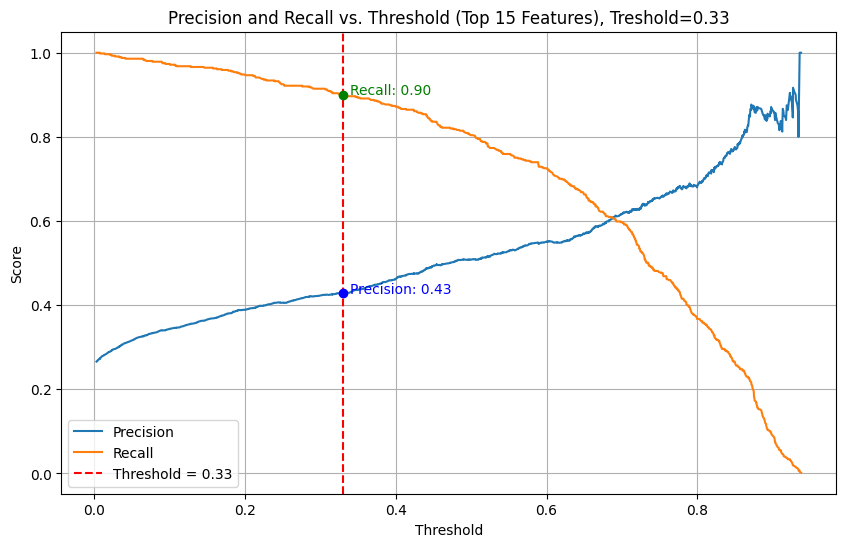

In [34]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, thresholds = precision_recall_curve(y_test, y_probs_top)

plt.figure(figsize=(10,6))
plt.plot(thresholds, precision[:-1], label="Precision")
plt.plot(thresholds, recall[:-1], label="Recall")

# Highlight threshold = 0.33
thresh_033_idx = (np.abs(thresholds - 0.33)).argmin()
plt.axvline(x=0.33, color='red', linestyle='--', label='Threshold = 0.33')
plt.scatter([0.33], [precision[thresh_033_idx]], color='blue', zorder=5)
plt.scatter([0.33], [recall[thresh_033_idx]], color='green', zorder=5)
plt.text(0.34, precision[thresh_033_idx], f"Precision: {precision[thresh_033_idx]:.2f}", color='blue')
plt.text(0.34, recall[thresh_033_idx], f"Recall: {recall[thresh_033_idx]:.2f}", color='green')

plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision and Recall vs. Threshold (Top 15 Features), Treshold=0.33")
plt.legend()
plt.grid(True)
plt.show()

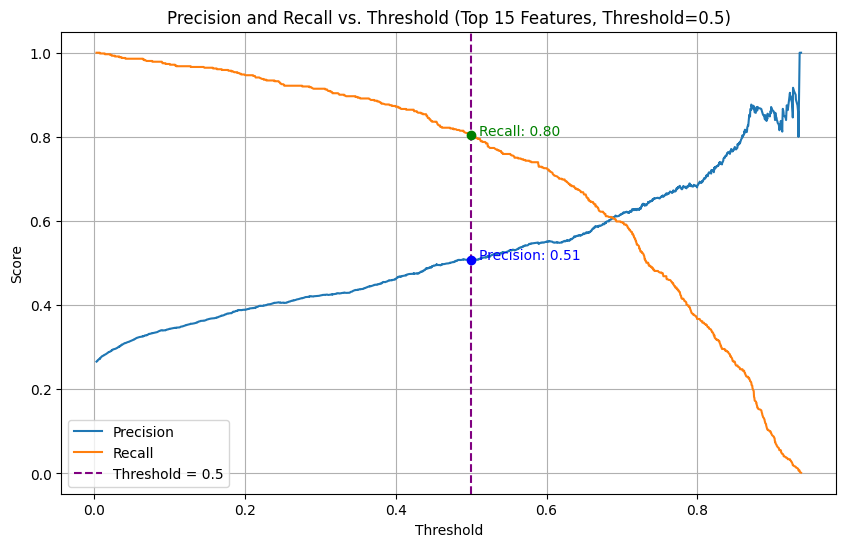

In [33]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
import numpy as np

precision, recall, thresholds = precision_recall_curve(y_test, y_probs_top)

plt.figure(figsize=(10,6))
plt.plot(thresholds, precision[:-1], label="Precision")
plt.plot(thresholds, recall[:-1], label="Recall")

# Highlight threshold = 0.5
thresh_05_idx = (np.abs(thresholds - 0.5)).argmin()
plt.axvline(x=0.5, color='purple', linestyle='--', label='Threshold = 0.5')
plt.scatter([0.5], [precision[thresh_05_idx]], color='blue', zorder=5)
plt.scatter([0.5], [recall[thresh_05_idx]], color='green', zorder=5)
plt.text(0.51, precision[thresh_05_idx], f"Precision: {precision[thresh_05_idx]:.2f}", color='blue')
plt.text(0.51, recall[thresh_05_idx], f"Recall: {recall[thresh_05_idx]:.2f}", color='green')

plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision and Recall vs. Threshold (Top 15 Features, Threshold=0.5)")
plt.legend()
plt.grid(True)
plt.show()

In [31]:
import joblib

# Save the full-feature model
joblib.dump(model, 'logistic_regression_model_full.pkl')

['logistic_regression_model_full.pkl']

In [32]:
import joblib
# Save the top 15 features model
joblib.dump(model_top, 'logistic_regression_model_top15.pkl')

['logistic_regression_model_top15.pkl']

### Summary

- **Threshold 0.55** is more balanced and achieves higher accuracy.
- **Threshold 0.33** is better if the goal is to catch as many churners as possible, even if it means more false alarms.

In this project ,I am demonstrating how changing the threshold affects the trade-off between precision and recall. The best threshold depends on the specific business goal—whether it is more important to minimize false positives or to catch every possible churner.